Two-class classification, or binary classification, is the most widely applied type of machine-learning problem

The IMDB dataset: a set of 50,000 highly polarized reviews from the Internet Movie Database. They're split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.

# Loading the IMDB Dataset

In [5]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# the argument num_words=10000 means you'll only keep the top 10,000 most frequnetly occuring words in the training data

In [3]:
# train_data and test_data are lists of reviews; each review is a list of word indices (encoding a sequence of words)
# train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
train_labels[0]

1

In [7]:
max([max(sequence) for sequence in train_data])
# because you're restricting yourself to the top 10,000 most frequent words, no word index will exceed 10,000

9999

In [8]:
# Quickly decoding one the these reviews back to English
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

# Preparing the Data

You can't feed list of integers into a neural network. You have to turn your lists into tensors; 
-Pad your lists so they all have the same length,t urn them into an integer tensor of 2D shape (samples, word_indices)
-Onehot encode your lists to turn them into vectors of 0s and 1s.

In [9]:
# Encoding the integer sequences into a binary matrix
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # creates an all-zero matrix of shape(len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # sets specified indices of results[i] to 1s
        results[i, sequence] = 1
    return results

# vectorized training data
X_train = vectorize_sequences(train_data)
# vectorized test data
X_test = vectorize_sequences(test_data)

In [10]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Building your Network

The input data is vectors, and the labels are scalars(0s and 1s).

A type of network that performs well on such a problem is a simple stack of fully connected(Dense) layers with relu activations: Dense(16, activation='relu').
The argument being passed to each Dense layer (16) is the number of hidden units of the layer. The hidden unit is a dimension in the representation space of the layer.

Two architecture decsions to be made about such a stack of Dense layers: How many layers to use; How many hidden units to choose for each layer.

Here we'll use two intermediate layers with 16 hidden units each and a third layer that will output the scalar prediction regarding the sentiment of the current review.

The intermediate layers will use relu as their activation function, and the final layer will use a sigmoid activation so as to output a probability(a score between 0 and 1) indicating how likely the sample is to have the target "1" (how likely the review is to be positive)

A relu(rectified linear unit) is a function meant to zero out negative values, whereas a sigmoid 'squashes' arbitrary values into the [0,1] interval, outputting something that can be interpreted as a probability

In [12]:
# the Model Definition
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Finally, you need to choose a loss function and an optimizer. 
In this case, it is best to use binary_crossentropy loss when dealing with models that output probabilities.
Crossentropy is a quantity from the field of Information Theory that measures the distance between probability distributions or, in this case, between the ground-truth distribution and your predictions.

In [13]:
# Compiling the model
model.compile(optimizer='rmsprop',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

# Validating your approach

In [14]:
# Setting aside a validation set
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
# Training your model
model.compile(optimizer='rmsprop',
             loss = 'binary_crossentropy',
             metrics=['acc'])
history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 299us/step - loss: 0.5087 - acc: 0.7807 - val_loss: 0.3794 - val_acc: 0.8695
Epoch 2/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.3006 - acc: 0.9055 - val_loss: 0.3003 - val_acc: 0.8900
Epoch 3/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.2180 - acc: 0.9283 - val_loss: 0.3081 - val_acc: 0.8715
Epoch 4/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.1750 - acc: 0.9436 - val_loss: 0.2838 - val_acc: 0.8838
Epoch 5/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.1425 - acc: 0.9545 - val_loss: 0.2848 - val_acc: 0.8863
Epoch 6/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.1148 - acc: 0.9654 - val_loss: 0.3146 - val_acc: 0.8776
Epoch 7/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.0978 - acc: 0.9707 - val_loss: 0.3130 - 

In [16]:
# Notice that model.fit() returns a History object. This object has a member history, which is a dictionary containing
# data about everything that happened during training.
history_dict = history.history
history_dict.keys()
# the dictionary contains 4 entries; one per metric that was being monitored during training and during validation

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

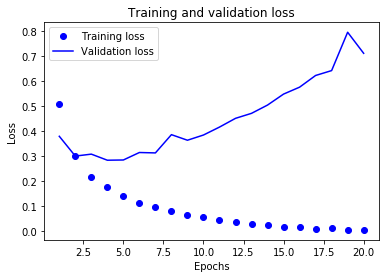

In [18]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss') # 'bo' is for blue dot
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss') # 'b' is for solid blue line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
# As you can see, the Training loss decreases with every epoch, and the training accuracy increases with every epoch

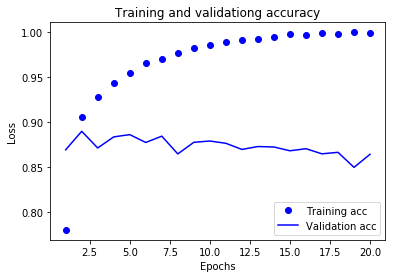

In [19]:
# Plotting the training and validation accuracy
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validationg accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
# That's what you expect when running a SGD optimization - the quantity you're trying to minimize should be less with
# every iteration.

In [20]:
# Retraining a modle from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(X_test, y_test)

results
# only 88% accuracy, with state-of-the-art approaches you should be able to get close to 95%

Epoch 1/4
25000/25000 [==============================] - 2s 97us/step - loss: 0.4728 - acc: 0.8216
Epoch 2/4
25000/25000 [==============================] - 2s 89us/step - loss: 0.2666 - acc: 0.9096
Epoch 3/4
25000/25000 [==============================] - 2s 90us/step - loss: 0.2031 - acc: 0.9286
Epoch 4/4
25000/25000 [==============================] - 4s 167us/step


[0.31129327630996706, 0.87636]

# Using a trained network to generate predictions on new data

In [21]:
model.predict(X_test)

array([[0.15694349],
       [0.99982953],
       [0.40489116],
       ...,
       [0.08270579],
       [0.05063814],
       [0.46859953]], dtype=float32)